# Exploring data

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import HistGradientBoostingRegressor


# Load the dataset
url = "https://www.dropbox.com/scl/fi/w0pri1ui24lhbnxod3h81/survey_results_public.csv?rlkey=5vdh0nb4nlhriz3tm488ugfit&st=uq825w8l&dl=1"
df = pd.read_csv(url)

# Check the first few rows to verify the data loaded correctly
df.head()


,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


# Cleaning & Wrangling Data

In [ ]:
# Check the first few rows to verify the data loaded correctly
df.head()

# Cleaning Step: Remove rows with missing values in 'ConvertedCompYearly'
df_cleaned = df.dropna(subset=['ConvertedCompYearly'])

# Check the result
print("Remaining rows after cleaning:", df_cleaned.shape[0])
print("Missing values in 'ConvertedCompYearly':", df_cleaned['ConvertedCompYearly'].isnull().sum())

Remaining rows after cleaning: 48019
Missing values in 'ConvertedCompYearly': 0


- Basic Information

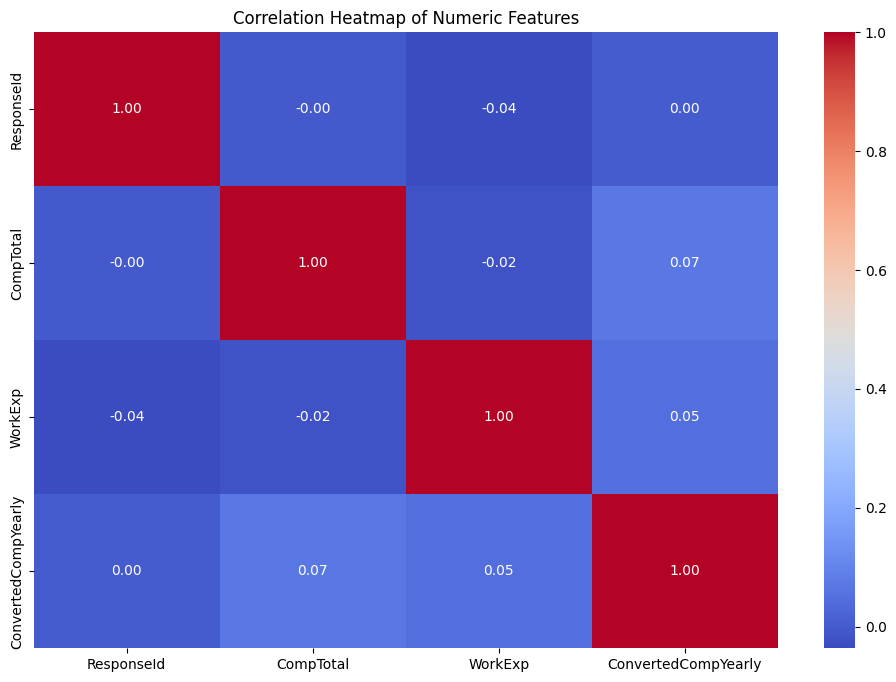

Top correlations with ConvertedCompYearly:
 ConvertedCompYearly    1.000000
CompTotal              0.071403
WorkExp                0.046078
ResponseId             0.001831
Name: ConvertedCompYearly, dtype: float64


In [ ]:
# Filter only numeric columns
numeric_df = df_cleaned.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Focus on the correlation with 'ConvertedCompYearly'
correlations_with_converted_comp = correlation_matrix['ConvertedCompYearly'].sort_values(ascending=False)

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

# Display the top correlated features with 'ConvertedCompYearly'
print("Top correlations with ConvertedCompYearly:\n", correlations_with_converted_comp.head(10))


In [ ]:
# Remove columns with low correlation to 'ConvertedCompYearly'
columns_to_drop = ['CompTotal', 'WorkExp', 'ResponseId']
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

# Verify the removal
print(df_cleaned.columns)


Index(['Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith',
       'OpSysPersonal use', 'OpSysProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith',
       'AISearchHaveWorkedWith', 'AISearchWantToWorkWith',
       'AIDevHaveWor

Delete the unneeded columns

In [ ]:
# List of columns to delete
columns_to_delete = [
    'Q120', 'MainBranch', 'Employment', 'RemoteWork',
    'CodingActivities', 'LearnCode', 'LearnCodeOnline',
    'LearnCodeCoursesCert', 'OrgSize',
    'PurchaseInfluence', 'TechList', 'BuyNewTool',
    'LanguageWantToWorkWith', 'DatabaseWantToWorkWith',
    'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
    'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
    'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
    'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
    'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
    'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
    'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
    'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
    'AISearchWantToWorkWith', 'AIDevHaveWorkedWith',
    'AIDevWantToWorkWith', 'NEWSOSites', 'SOVisitFreq',
    'SOAccount', 'SOPartFreq', 'SOComm', 'SOAI',
    'AISelect', 'AISent', 'AIAcc', 'AIBen',
    'AIToolInterested in Using', 'AIToolCurrently Using',
    'AIToolNot interested in Using', 'AINextVery different',
    'AINextNeither different nor similar', 'AINextSomewhat similar',
    'AINextVery similar', 'AINextSomewhat different', 'TBranch',
    'ICorPM', 'Frequency_1', 'Frequency_2', 'Frequency_3',
    'TimeSearching', 'TimeAnswering','SurveyLength', 'SurveyEase'
]

# Drop the specified columns
df.drop(columns=columns_to_delete, inplace=True, errors='ignore')

# Check the remaining columns to verify deletion
print("\nDataFrame after dropping specified columns:")
print(df.head())
print("\nRemaining columns:")
print(df.columns.tolist())



DataFrame after dropping specified columns:
   ResponseId              Age                                       EdLevel  \
0           1  18-24 years old                                           NaN   
1           2  25-34 years old  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2           3  45-54 years old  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
3           4  25-34 years old  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
4           5  25-34 years old  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

  YearsCode YearsCodePro                               DevType  \
0       NaN          NaN                                   NaN   
1        18            9  Senior Executive (C-Suite, VP, etc.)   
2        27           23                   Developer, back-end   
3        12            7                  Developer, front-end   
4         6            4                 Developer, full-stack   

                    Country                   Currency  CompTotal  \
0       

In [ ]:
# Count the number of remaining columns
num_columns = df.shape[1]
print(f"\nNumber of remaining columns: {num_columns}")


Number of remaining columns: 24


In [ ]:
# Check data types of each column
print(df.dtypes)


ResponseId                  int64
Age                        object
EdLevel                    object
YearsCode                  object
YearsCodePro               object
DevType                    object
Country                    object
Currency                   object
CompTotal                 float64
LanguageHaveWorkedWith     object
DatabaseHaveWorkedWith     object
PlatformHaveWorkedWith     object
WorkExp                   float64
Knowledge_1                object
Knowledge_2                object
Knowledge_3                object
Knowledge_4                object
Knowledge_5                object
Knowledge_6                object
Knowledge_7                object
Knowledge_8                object
ProfessionalTech           object
Industry                   object
ConvertedCompYearly       float64
dtype: object


- Discover DevType

In [ ]:
# Display unique DevType values in the dataset
unique_devtypes = df['DevType'].dropna().unique()
print("Unique DevType entries:", unique_devtypes)

# Splitting and expanding to get a list of all unique roles across entries
all_devtypes = set([role.strip() for entry in unique_devtypes for role in entry.split(';')])
print("\nList of all unique DevType roles:")
for devtype in sorted(all_devtypes):
    print(devtype)


Unique DevType entries: ['Senior Executive (C-Suite, VP, etc.)' 'Developer, back-end'
 'Developer, front-end' 'Developer, full-stack' 'System administrator'
 'Developer, desktop or enterprise applications' 'Developer, QA or test'
 'Designer' 'Data scientist or machine learning specialist'
 'Data or business analyst' 'Security professional' 'Educator'
 'Research & Development role' 'Other (please specify):'
 'Developer, mobile' 'Database administrator'
 'Developer, embedded applications or devices' 'Student' 'Engineer, data'
 'Hardware Engineer' 'Product manager' 'Academic researcher'
 'Developer, game or graphics' 'Cloud infrastructure engineer'
 'Engineering manager' 'Developer Experience' 'Project manager'
 'DevOps specialist' 'Engineer, site reliability' 'Blockchain'
 'Developer Advocate' 'Scientist' 'Marketing or sales professional']

List of all unique DevType roles:
Academic researcher
Blockchain
Cloud infrastructure engineer
Data or business analyst
Data scientist or machine lea

In [ ]:
# Drop NaN values and split 'DevType' entries into individual roles
devtype_expanded = df['DevType'].dropna().str.split(';').explode().str.strip()

# Count the occurrences of each unique role
devtype_counts = devtype_expanded.value_counts()

# Display the total number of unique roles and the count for each role
print(f"Total number of unique DevType roles: {devtype_counts.shape[0]}")
print("\nCount of entries per DevType role:\n", devtype_counts)

Total number of unique DevType roles: 33

Count of entries per DevType role:
 DevType
Developer, full-stack                            25735
Developer, back-end                              13745
Developer, front-end                              5071
Developer, desktop or enterprise applications     3904
Other (please specify):                           3080
Developer, mobile                                 2597
Engineering manager                               2033
Student                                           1996
Developer, embedded applications or devices       1845
Data scientist or machine learning specialist     1588
DevOps specialist                                 1387
Academic researcher                               1354
Research & Development role                       1353
Senior Executive (C-Suite, VP, etc.)              1332
Engineer, data                                    1248
Cloud infrastructure engineer                     1036
Developer, game or graphics       

# ML

Random Forest Regressor

In [ ]:
# Remove rows with missing values in 'ConvertedCompYearly'
df_cleaned = df.dropna(subset=['ConvertedCompYearly'])

# Encode the 'DevType' column (position/job title)
df_encoded = pd.get_dummies(df_cleaned[['DevType', 'ConvertedCompYearly']], drop_first=True)

# Split data into features (X) and target (y)
X = df_encoded.drop('ConvertedCompYearly', axis=1)
y = df_encoded['ConvertedCompYearly']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 60093.078065855785
Root Mean Squared Error: 106710.4030517729


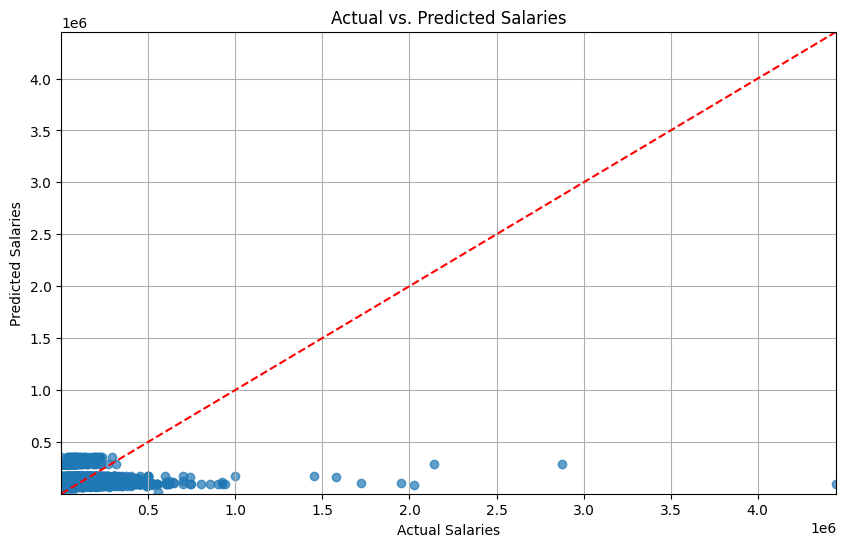

In [ ]:
# Scatter plot of Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Line of perfect prediction
plt.title('Actual vs. Predicted Salaries')
plt.xlabel('Actual Salaries')
plt.ylabel('Predicted Salaries')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.grid()
plt.show()


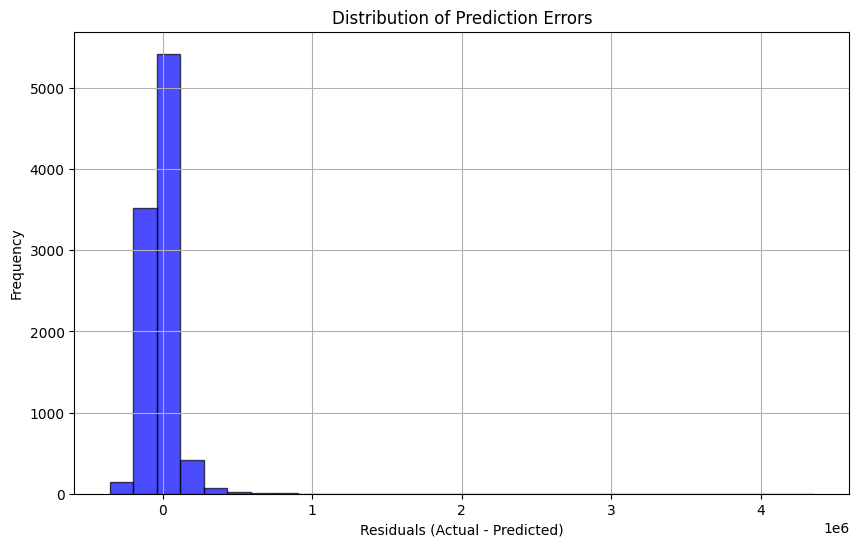

In [ ]:
# Calculate the residuals (errors)
residuals = y_test - y_pred

# Histogram of Residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid()
plt.show()


In [ ]:
# Predict on training data
y_train_pred = model.predict(X_train)

# Predict on test data
y_test_pred = model.predict(X_test)

# Calculate metrics for training set
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Calculate metrics for test set
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Training Set Performance:")
print(f"Mean Absolute Error: {train_mae}")
print(f"Root Mean Squared Error: {train_rmse}")

print("\nTesting Set Performance:")
print(f"Mean Absolute Error: {test_mae}")
print(f"Root Mean Squared Error: {test_rmse}")


Training Set Performance:
Mean Absolute Error: 70859.096943387
Root Mean Squared Error: 759256.6622214675

Testing Set Performance:
Mean Absolute Error: 60093.078065855785
Root Mean Squared Error: 106710.4030517729


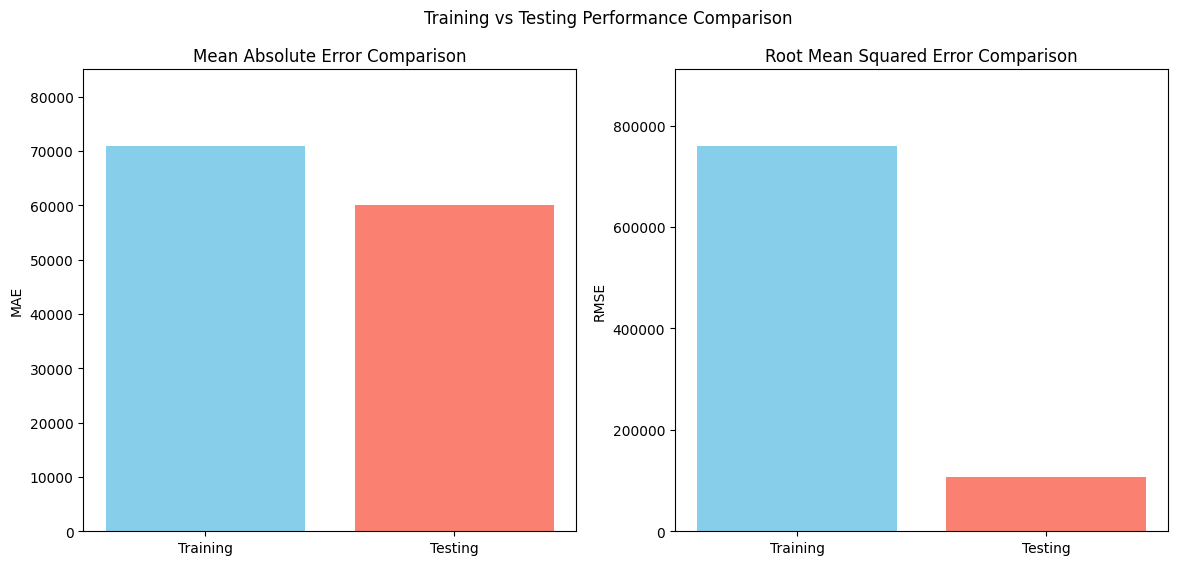

In [ ]:

# Performance metrics for training and testing sets
metrics = ['Mean Absolute Error', 'Root Mean Squared Error']
training_scores = [70859.096943387, 759256.6622214675]
testing_scores = [60093.078065855785, 106710.4030517729]

# Set up the plot
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart for Mean Absolute Error
ax[0].bar(['Training', 'Testing'], training_scores[:1] + testing_scores[:1], color=['skyblue', 'salmon'])
ax[0].set_title('Mean Absolute Error Comparison')
ax[0].set_ylabel('MAE')
ax[0].set_ylim(0, max(training_scores[0], testing_scores[0]) * 1.2)

# Bar chart for Root Mean Squared Error
ax[1].bar(['Training', 'Testing'], training_scores[1:] + testing_scores[1:], color=['skyblue', 'salmon'])
ax[1].set_title('Root Mean Squared Error Comparison')
ax[1].set_ylabel('RMSE')
ax[1].set_ylim(0, max(training_scores[1], testing_scores[1]) * 1.2)

# Display the plots
plt.suptitle('Training vs Testing Performance Comparison')
plt.show()


# ML draft

In [ ]:
# Check the data types of the columns
print(df.dtypes)

# Define numerical columns - only include those that are numeric
numerical_columns = ['Age', 'YearsCode', 'YearsCodePro', 'WorkExp']  # Adjust this based on your data types
# If 'Age' is not numeric, you might need to process it
if df['Age'].dtype == 'object':
    # Convert age ranges to numeric, for example, you could create a mapping
    age_mapping = {
        '18-24 years old': 21,
        '25-34 years old': 29,
        '35-44 years old': 39,
        '45-54 years old': 49,
        '55-64 years old': 59,
        '65 years or older': 65
    }
    df['Age'] = df['Age'].map(age_mapping)

# Define categorical columns
categorical_columns = ['MainBranch', 'Employment', 'RemoteWork', 'EdLevel', 'DevType', 'Country']

# After mapping, ensure that 'Age' is numeric
numerical_columns = [col for col in numerical_columns if df[col].dtype in ['int64', 'float64']]


# Define Imputers
numerical_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Define Scaler and OneHotEncoder
scaler = StandardScaler()
onehot_encoder = OneHotEncoder(handle_unknown='ignore')

# Create Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[('imputer', numerical_imputer), ('scaler', scaler)]), numerical_columns),
        ('cat', Pipeline(steps=[('imputer', categorical_imputer), ('onehot', onehot_encoder)]), categorical_columns)
    ]
)

# Split the data into features (X) and target (y)
from sklearn.model_selection import train_test_split
X = df.drop('ConvertedCompYearly', axis=1)
y = df['ConvertedCompYearly']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply the preprocessing to training and test sets
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Preprocessing complete!")
print(f"Processed training data shape: {X_train_processed.shape}")
print(f"Processed test data shape: {X_test_processed.shape}")


ResponseId               int64
Q120                    object
MainBranch              object
Age                    float64
Employment              object
                        ...   
ProfessionalTech        object
Industry                object
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
Length: 84, dtype: object
Preprocessing complete!
Processed training data shape: (71347, 246)
Processed test data shape: (17837, 246)


In [ ]:
# Get the feature names from the numerical and categorical transformers
numerical_feature_names = numerical_columns  # Original numerical column names

# Get the transformed categorical feature names
categorical_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_columns)

# Combine all feature names into a single list
all_feature_names = list(numerical_feature_names) + list(categorical_feature_names)

# Print the feature names
print("New feature names after preprocessing:")
for feature in all_feature_names:
    print(feature)


New feature names after preprocessing:
Age
WorkExp
MainBranch_I am a developer by profession
MainBranch_I am learning to code
MainBranch_I am not primarily a developer, but I write code sometimes as part of my work/studies
MainBranch_I code primarily as a hobby
MainBranch_I used to be a developer by profession, but no longer am
MainBranch_None of these
Employment_Employed, full-time
Employment_Employed, part-time
Employment_I prefer not to say
Employment_Independent contractor, freelancer, or self-employed
Employment_Not employed, and not looking for work
Employment_Not employed, but looking for work
Employment_Retired
Employment_Student, full-time
Employment_Student, part-time
RemoteWork_Hybrid (some remote, some in-person)
RemoteWork_In-person
RemoteWork_Remote
EdLevel_Associate degree (A.A., A.S., etc.)
EdLevel_Bachelor’s degree (B.A., B.S., B.Eng., etc.)
EdLevel_Master’s degree (M.A., M.S., M.Eng., MBA, etc.)
EdLevel_Primary/elementary school
EdLevel_Professional degree (JD, MD, Ph

In [ ]:
df = df.dropna(subset=['ConvertedCompYearly'])

In [ ]:
# Check for NaNs in the sparse matrix
missing_values_count = np.sum(X_train_processed.toarray() == np.nan)
print("Missing values in X_train_processed:", missing_values_count)

Missing values in X_train_processed: 0


In [ ]:
print("Shape of X_train_processed:", X_train_processed.shape)
print("Shape of y_train:", y_train.shape)


Shape of X_train_processed: (71347, 336)
Shape of y_train: (71347,)


In [ ]:
# Drop rows with NaNs in the target variable
df_cleaned = df.dropna(subset=['ConvertedCompYearly'])

# Prepare the features and target
X = df_cleaned.drop('ConvertedCompYearly', axis=1)
y = df_cleaned['ConvertedCompYearly']

# Split into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = X_train.select_dtypes(exclude=['object']).columns


# Create the preprocessor with handle_unknown='ignore' and the transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

In [ ]:
# Create a pipeline with preprocessing
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit the preprocessor on the training data
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

In [ ]:
print("Shape of X_train_processed:", X_train_processed.shape)
print("Shape of y_train:", y_train.shape)


Shape of X_train_processed: (38415, 167854)
Shape of y_train: (38415,)


In [ ]:
model = HistGradientBoostingRegressor()


In [ ]:
X_train_dense = X_train_processed.toarray()  # X_train_processed is a sparse matrix
model.fit(X_train_dense, y_train)
